In [1]:
import sqlite3

#create database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
#create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

cursor.executemany("""
INSERT INTO sales (product, quantity, price)
VALUES(?,?,?)
""", [
    ("Laptop", 3, 50000),
    ("Laptop", 2, 50000),
    ("Mobile", 10, 15000),
    ("Mobile", 5, 15000),
    ("Tablet", 4, 22000)
])

conn.commit()
conn.close()

print("sales_data.db created successfully!")




sales_data.db created successfully!


In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()
df



,product,total_qty,revenue
0,Laptop,5,250000.0
1,Mobile,15,225000.0
2,Tablet,4,88000.0


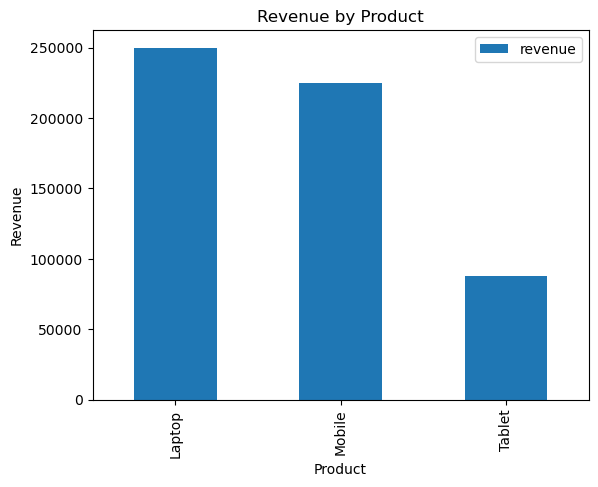

In [5]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product',y='revenue')

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

plt.show()